In [ ]:
!git clone https://github.com/coetaur0/staticfg.git
%cd staticfg 
!pip install --upgrade .

!git clone https://github.com/OmkarPathak/Python-Programs.git
%cd Python-Programs/CompetitiveProgramming/CodeChef/

!pip install angr monkeyhex

Cloning into 'staticfg'...
remote: Enumerating objects: 223, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 223 (delta 22), reused 42 (delta 15), pack-reused 168
Receiving objects: 100% (223/223), 105.79 KiB | 10.58 MiB/s, done.
Resolving deltas: 100% (105/105), done.
/content/staticfg
Processing /content/staticfg
  Created wheel for staticfg: filename=staticfg-0.9.5-cp37-none-any.whl size=12007 sha256=002564db507726b83a15b8acb44fa8156a457a500255d8e02b12ccc0539fa72c
  Stored in directory: /tmp/pip-ephem-wheel-cache-vd0cbf1j/wheels/c9/02/dd/7e51714d8d40b9ceebe6da4e756306069e25e071b204b45117
Successfully built staticfg
Cloning into 'Python-Programs'...
remote: Enumerating objects: 1543, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 1543 (delta 2), reused 2 (delta 0), pack-reused 1536
Receiving objects: 100% (1543/1543), 655.50 KiB | 24.28 MiB/s, done.
Resol

In [ ]:
### angr tutorial

import os
import angr
import monkeyhex
from tqdm import tqdm

import networkx as nx
import scipy as sp
import numpy as np

import matplotlib.pyplot as plt
import pprint

In [ ]:
for i, filename in enumerate(tqdm(os.listdir('/bin'))):
  if i > 1:
    break
  if filename in ['ignore list']: 
    pass
  else:  
    path = os.path.join('/bin', filename)
    proj = angr.Project(path,
                        load_options={'auto_load_libs': False})

    tqdm.write(proj.filename)
    cfg = proj.analyses.CFGFast()
    tqdm.write("%d nodes, %d edges" % (len(cfg.graph.nodes()), len(cfg.graph.edges())))
    G = cfg.graph


  0%|          | 0/110 [00:00<?, ?it/s]WARNING | 2021-05-06 05:40:34,836 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.


login


  1%|          | 1/110 [00:02<05:26,  2.99s/it]WARNING | 2021-05-06 05:40:37,817 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.


Name: 
Type: DiGraph
Number of nodes: 2229
Number of edges: 4247
Average in degree:   1.9053
Average out degree:   1.9053
df


  2%|▏         | 2/110 [00:08<08:04,  4.49s/it]

Name: 
Type: DiGraph
Number of nodes: 4321
Number of edges: 7547
Average in degree:   1.7466
Average out degree:   1.7466


In [ ]:
i = 0
for g in nx.weakly_connected_components(cfg.graph):
  if len(g) <= 2:
    continue
  print(len(g))
  i+= 1
  if i > 10:
    break

104077
10
4
4
4
13
23
10
13
16
33


In [ ]:
centrality = nx.eigenvector_centrality_numpy(cfg.graph)

# expansion
# d regular graph 
# random walk 
# regions where you cant escap
# subgraph angr separate into subgraphs 

# degree, ev gap

In [ ]:
for n in centrality:
  print(centrality[n])
  break

-2.5049062438354217e-19


In [ ]:
sp_adj = nx.convert_matrix.to_scipy_sparse_matrix(cfg.graph)

In [ ]:
type(sp_adj)

scipy.sparse.csr.csr_matrix

In [ ]:
import scipy
eig = scipy.sparse.linalg.eigs(sp_adj.asfptype(),k=100)

/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:851: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:1969: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         2.,  4.,  4.,  1.,  1.,  0.,  3.,  1.,  0.,  3.,  2.,  1.,  2.,
         2.,  2.,  3.,  2., 23., 22.,  8.,  4.,  3.,  1.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([-3.19459615-5.80341029j, -2.99201776-5.68734209j,
        -2.78943937-5.57127388j, -2.58686099-5.45520568j,
        -2.3842826 -5.33913747j, -2.18170421-5.22306926j,
        -1.97912582-5.10700106j, -1.77654743-4.99093285j,
        -1.57396904-4.87486465j, -1.37139065-4.75879644j,
        -1.16881226-4.64272823j, -0.96623387-4.52666003j,
        -0.76365548-4.41059182j, -0.56107709-4.29452362j,
        -0.35849871-4.17845541j, -0.15592032-4.06238721j,
         0.04665807-3.946319j  ,  0.24923646-3.83025079j,
         0.45181485-3.71418259j,  0.65439324-3.59811438j,
         0.85697163-3.48204618j,  1.05955002-3.36597797j,
         1.26212841-3.24990976j,  1.4647068 -3.13384156j,
         1.66728518-

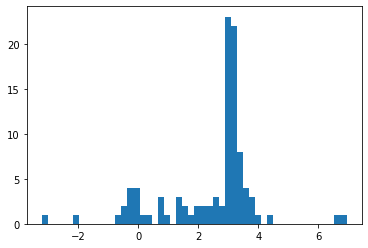

In [ ]:
from matplotlib import pyplot as plt
plt.hist(eig[0],bins=50)

In [ ]:
import os
from staticfg import CFGBuilder
directory = os.fsencode('./')

graphs = []
fnames = []
for filename in os.listdir(directory):
    fnamestr = str(filename,'utf-8')
    if fnamestr.endswith(".py"): 
      try:
        cfg = CFGBuilder().build_from_file(fnamestr, fnamestr)
      except:
        continue
      fnames.append(fnamestr)
      graphs.append(cfg2nx(cfg, fnamestr))
len(graphs)

16

P37_NDIFFPAL.py
{   1: 'block:1@47',
    2: 'link from block:1@47 to block:2@48',
    4: 'link from block:2@48 to block:4@51',
    6: 'link from block:2@48 to block:6@53'}


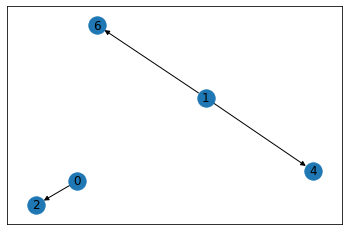

In [ ]:
import matplotlib.pyplot as plt
import pprint
pp = pprint.PrettyPrinter(indent=4)

idx = 1
G = graphs[idx]
print(fnames[idx])

pos = nx.spring_layout(G)
labels = nx.get_node_attributes(G, 'str')
pp.pprint(labels)

nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'))
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.show()

In [ ]:
# get some statistics

for i,g in enumerate(graphs):
  print(nx.info(g))
  print()

Name: P09_ERROR.py
Type: DiGraph
Number of nodes: 6
Number of edges: 4
Average in degree:   0.6667
Average out degree:   0.6667

Name: P37_NDIFFPAL.py
Type: DiGraph
Number of nodes: 5
Number of edges: 3
Average in degree:   0.6000
Average out degree:   0.6000

Name: P04_CONFLIP.py
Type: DiGraph
Number of nodes: 10
Number of edges: 8
Average in degree:   0.8000
Average out degree:   0.8000

Name: P13_SPCANDY.py
Type: DiGraph
Number of nodes: 6
Number of edges: 4
Average in degree:   0.6667
Average out degree:   0.6667

Name: P22_PLZYKME.py
Type: DiGraph
Number of nodes: 8
Number of edges: 6
Average in degree:   0.7500
Average out degree:   0.7500

Name: P01_CIELAB.py
Type: DiGraph
Number of nodes: 5
Number of edges: 3
Average in degree:   0.6000
Average out degree:   0.6000

Name: P16_POTATOES.py
Type: DiGraph
Number of nodes: 14
Number of edges: 10
Average in degree:   0.7143
Average out degree:   0.7143

Name: P21_ALEXNUMB.py
Type: DiGraph
Number of nodes: 4
Number of edges: 2
Average